In [1]:
import pandas as pd
import os

tweets = pd.read_csv('./tweets.csv')
tweets.head()

,Location,Text
0,NaN,@Newsweek FOIA request proves CDC Has NO STUDI...
1,NaN,@Newsweek When will #doctorsspeakup and admit ...
2,NaN,@unhealthytruth Epic fail on Todd’s part. Thou...
3,NaN,@PaulLidicul When will there be a sycophancy v...
4,NaN,"@CFosee @CDCDirector wow, disrespecting an ent..."


In [2]:
# Load the regular expression library
import re

# Remove punctuation
tweets['text_processed'] = tweets['Text'].map(lambda x: re.sub('[,\.!?]', '', x))
tweets['text_processed'] = tweets['Text'].map(lambda x: re.sub('@[^\s]', '', x))
# Convert the titles to lowercase
tweets['text_processed'] = tweets['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
tweets['text_processed'].head()

0    ewsweek foia request proves cdc has no studies...
1    ewsweek when will #doctorsspeakup and admit th...
2    nhealthytruth epic fail on todd’s part. thousa...
3    aullidicul when will there be a sycophancy vac...
4    fosee dcdirector wow, disrespecting an entire ...
Name: text_processed, dtype: object

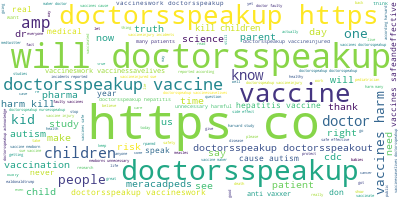

In [3]:
from wordcloud import WordCloud

#join tweets together
long_string = ','.join(list(tweets['text_processed'].values))

#create WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

#generate a word cloud
wordcloud.generate(long_string)

#viz
wordcloud.to_image()

In [20]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Function to find 10 most common words
def plot_top_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with stopwords
stop_words = text.ENGLISH_STOP_WORDS.union({"vaccine", "vaccines", "doctorsspeakup", "doctorsspeakout", "https"})
count_vectorizer = CountVectorizer(stop_words=stop_words)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tweets['text_processed'])# Visualise the 10 most common words

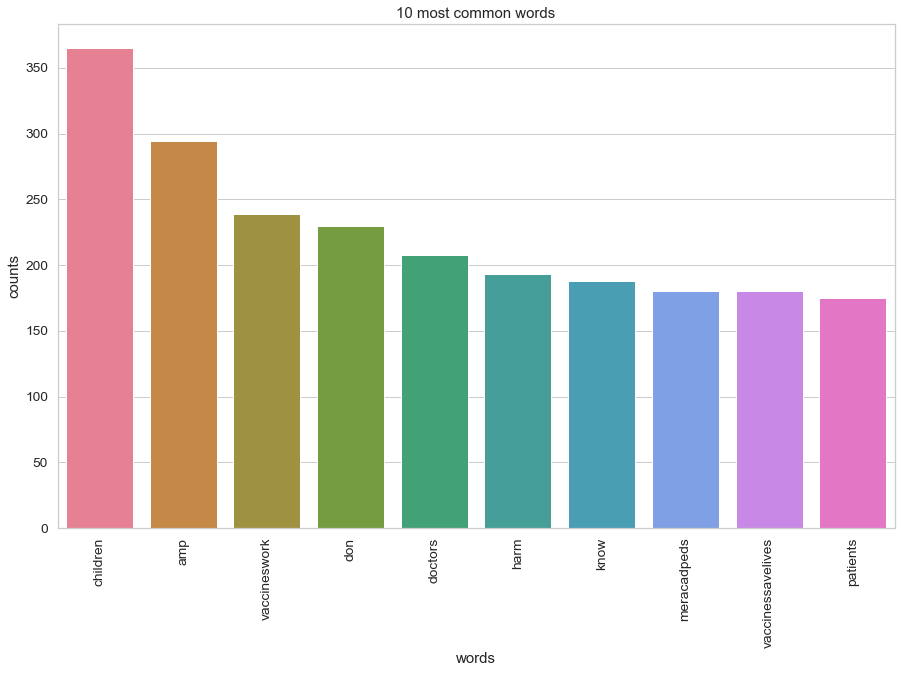

In [21]:
#viz
plot_top_words(count_data, count_vectorizer)

In [22]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 10
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
patients won harm pharma doctors vaccineswork children vaccinessavelives need like ve question study cancer don

Topic #1:
vaccineswork vaccinessavelives amp doggmd thank just nursesspeakup anti know hashtag twitter veamk icoleb_md movement doctor

Topic #2:
children harm kill kids know cause vaccinated autism don vaccineswork cdc studies vaccinessavelives measles diseases

Topic #3:
harmful unnecessary hepatitis newborns meracadpeds children save know true apmichigan does people doctors lives life

Topic #4:
icoleb_md safe science amp don effective pharma rtoddwo rpanmd kids know doggmd vaccineswork settled just

Topic #5:
coronavirus votebluenomatterwho impeachbarr resistance resist gopbetrayedamerica gopvotingblue voteblue2020 people doctors don safety safe ealdonaldtrump amp

Topic #6:
amp safeandeffective risk children injury meracadpeds flu truth people dr vaccineswork like parents doctors don

Topic #7:
doctor vaccineinjured sue anti faulty maker

In [23]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

LDAvis_data_filepath = os.path.join('./vaccine_tweets_lda'+str(number_topics))
LDAvis_data_filepath = LDAvis_data_filepath.encode('utf-8').strip()

Wall time: 206 ms


C:\Users\britt\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
C:\Users\britt\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [24]:
# this is a bit time consuming - make the if statement True if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
    with open(LDAvis_data_filepath, 'rb') as f:    
        LDAvis_prepared = pickle.load(f)
        
        pyLDAvis.save_html(LDAvis_prepared, './vaccine_tweets_lda'+ str(number_topics) +'.html')

C:\Users\britt\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [25]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './vaccine_tweets_lda'+ str(number_topics) +'.html')